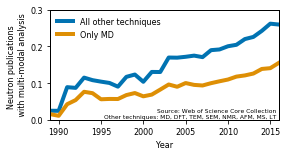

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl



mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.facecolor'] = 'w'
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.grid'] = True
#mpl.rcParams['grid.color'] = (0.8, 0.8, 0.8)
mpl.rcParams['xtick.top'] = False
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.facecolor'] = [1,1,1]
mpl.rcParams['legend.framealpha'] = 0.75
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.edgecolor'] = 'k'
mpl.rcParams['font.size'] = 6

year_a, all_neutron, a = np.loadtxt("all_neutron.txt", unpack = True, skiprows = 1)
year_b, all_xray, b = np.loadtxt("all_xray.txt", unpack = True, skiprows = 1)
year_c, multi_neutron, c = np.loadtxt("multi_neutron.txt", unpack = True, skiprows = 1)
year_d, multi_xray, d = np.loadtxt("multi_xray.txt", unpack = True, skiprows = 1)
year_e, neutron_md, c = np.loadtxt("neutron_md.txt", unpack = True, skiprows = 1)
year_f, xray_md, d = np.loadtxt("xray_md.txt", unpack = True, skiprows = 1)

year_max = int(np.amax([year_a[0], year_b[0], year_c[0], year_d[0]]))
longest_len = np.amax([len(year_a), len(year_b), len(year_c), len(year_d)])
years = []
all_neu = []
all_xra = []
multi_neu = []
multi_xra = []
neu_md = []
xra_md = [0, 0]
for a in range(year_max, 2017):
    years.append(a)
    for b in range(0, len(year_a)):
        if (year_a[b] == a):
            all_neu.append(all_neutron[b])
    for b in range(0, len(year_b)):
        if (year_b[b] == a):
            all_xra.append(all_xray[b])
    for b in range(0, len(year_c)):
        if (year_c[b] == a):
            multi_neu.append(multi_neutron[b])
    for b in range(0, len(year_d)):
        if (year_d[b] == a):
            multi_xra.append(multi_xray[b])
    for b in range(0, len(year_e)):
        if (year_e[b] == a):
            neu_md.append(neutron_md[b])
    for b in range(0, len(year_f)):
        if (year_f[b] == a):
            xra_md.append(xray_md[b])
    
            
all_neu = np.asarray(all_neu)
all_xra = np.asarray(all_xra)
multi_neu = np.asarray(multi_neu)
multi_xra = np.asarray(multi_xra)
neu_md = np.asarray(neu_md)
xra_md = np.asarray(xra_md)
    
fig, ax = plt.subplots(figsize=(4,2.16))
plt.plot(years, (multi_neu) / (all_neu), color='#0173B2', linewidth=4, label = 'All other techniques')
plt.plot(years, (neu_md) / (all_neu), color='#DE8F05', linewidth=4, label = 'Only MD')
plt.xlabel("Year")
#ax.tick_params(axis='x', colors='#888c8a')
#ax.tick_params(axis='y', colors='#888c8a')
plt.ylabel("Neutron publications \n with multi-modal analysis")
plt.xlim([np.amin(years), np.amax(years)])
leg = plt.legend(loc='upper left', frameon=False)
plt.ylim([0, 0.30])
plt.yticks([0, .10, .20, .30])
ax.text(0.99, 0.01, 'Source: Web of Science Core Collection\nOther techniques: MD, DFT, TEM, SEM, NMR, AFM, MS, LT',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes)
plt.tight_layout()
plt.savefig("figures/pubs.png", dpi=600)